# Dengue by Zone and Year in Singapore

---

# Source

https://outbreak.sgcharts.com/data

---

# CSV Columns and Column Descriptions

**Number Of Cases**

Number of reported dengue cases at this location

**Street Address**

Street address where dengue cases are reported (down to the apartment block level)

**Latitude**

Latitude of the street address

**Longitude**

Longitude of the street address

**Cluster Number**

Every dengue cluster is labelled with a serial number. However, this serial number cannot be used as an unique identifier because (1) the serial number is reused in other snapshots and (2) the serial number will change throughout the cluster's lifetime.

**Recent Cases In Cluster**

Number of dengue cases with onset in the last 2 weeks

**Total Cases In Cluster**

otal number of dengue cases reported in this cluster

**Date**

Date string in YYMMDD format

**Month Number**

Index number of the month, where 1=January and 12=December

---

# Open Files and Clean The Data

Source: https://www.geeksforgeeks.org/os-module-python-examples/

In [17]:
# import necessary libraries
import pandas as pd
import os
import glob
  
  
# use glob to get all the csv files 
# in the folder
path = "csv" #os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
df_list = []  
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
    df.columns = ['Number Of Cases', 'Street Address','Latitude','Longitude','Cluster Number','Recent Cases In Cluster','Total Cases In Cluster','Date','Month Number']

    df_list.append(df)
    ''' 
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df.head())
    print(df.shape)
    '''

In [18]:
merged_df = pd.concat(df_list, ignore_index=True, axis=0)

In [19]:
print(merged_df.shape)

(56720, 9)


In [20]:
merged_df.head()

,Number Of Cases,Street Address,Latitude,Longitude,Cluster Number,Recent Cases In Cluster,Total Cases In Cluster,Date,Month Number
0,7,bishan street 22 (block 233),1.358639,103.845259,1,24,83,150703,7
1,3,bishan street 22 (block 234),1.358390,103.845955,1,24,83,150703,7
2,1,bishan street 22 (block 235),1.358719,103.846477,1,24,83,150703,7
3,4,bishan street 22 (block 236),1.359041,103.846849,1,24,83,150703,7
4,1,bishan street 22 (block 237),1.359335,103.847097,1,24,83,150703,7


## Station List

['Admiralty', 'Ang Mo Kio', 'Botanic Garden', 'Bukit Panjang',
       'Bukit Timah', 'Buona Vista', 'Chai Chee', 'Changi',
       'Choa Chu Kang (Central)', 'Choa Chu Kang (South)', 'Clementi',
       'Dhoby Ghaut', 'East Coast Parkway', 'Jurong (West)',
       'Jurong Island', 'Jurong Pier', 'Kent Ridge', 'Kranji Reservoir',
       'Lim Chu Kang', 'Lower Peirce Reservoir', 'Macritchie Reservoir',
       'Mandai', 'Marina Barrage', 'Marine Parade', 'Newton',
       'Nicoll Highway', 'Pasir Panjang', 'Pasir Ris (Central)',
       'Pasir Ris (West)', 'Paya Lebar', 'Pulau Ubin', 'Punggol',
       'Queenstown', 'Seletar', 'Semakau Island', 'Sembawang',
       'Sentosa Island', 'Serangoon', 'Simei', 'Somerset (Road)',
       'Tai Seng', 'Tanjong Katong', 'Tengah', 'Toa Payoh', 'Tuas',
       'Tuas South', 'Tuas West', 'Ulu Pandan', 'Upper Peirce Reservoir',
       'Whampoa']

---

# Singapore Heatmap

https://towardsdatascience.com/lets-plot-airbnb-prices-on-a-map-of-singapore-ddbcae44fb69

Corner Bounds 

1.15N,103.5E & 1.50N,104E

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


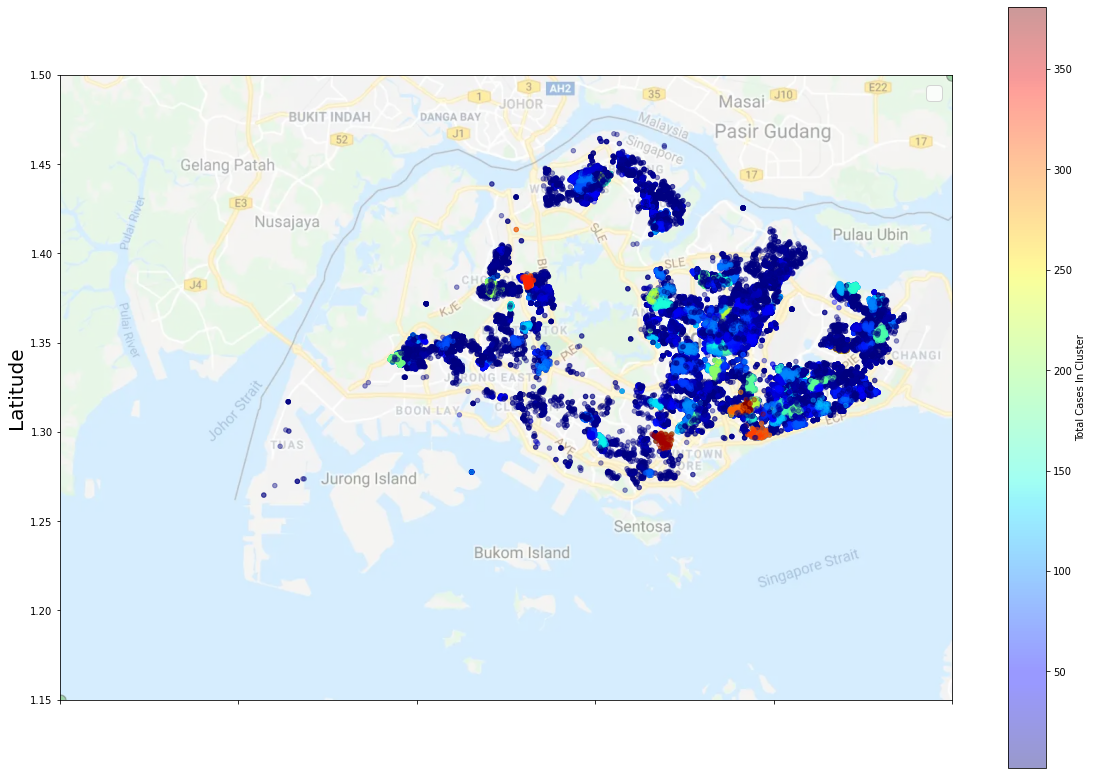

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# import our image 
singapore_img = mpimg.imread('sgmap.png')
# plot the data
ax = merged_df.plot(
    kind="scatter", 
    x="Longitude", 
    y="Latitude", 
    figsize=(20,14),
    c="Total Cases In Cluster", 
    cmap=plt.get_cmap("jet"),
    colorbar=True, 
    alpha=0.4,
)
# use our map with it's bounding coordinates
plt.imshow(singapore_img, extent=[103.5,104,1.15, 1.50], alpha=0.5)            
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# set the min/max axis values - these must be the same as above
plt.ylim(1.15, 1.50)
plt.xlim(103.5, 104)
plt.legend(fontsize=20)
plt.show()

---

# Spatial Data Analysis

https://medium.com/@lwyeong/choropleth-mapping-singapore-using-python-24cb26173fdd

---